<a href="https://www.kaggle.com/code/lalit7881/nobel-laureates-model-accuracy-overview-39-89?scriptVersionId=294579195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nobel-prize-winners/SDnobel.csv


## Title: Nobel Laureates

## Description:
This dataset provides comprehensive information about Nobel Prize winners across various categories such as Physics, Chemistry, Medicine, Literature, Peace, and Economic Sciences. It includes details like the laureate's name, year of award, category, country of birth, gender, and affiliation. The dataset enables analysis of trends in Nobel Prize awards over time, exploration of demographic patterns, and insights into contributions across disciplines and regions. Researchers and enthusiasts can use it to study historical patterns, gender representation, geographic distribution, and the evolution of scientific and cultural achievements recognized by the Nobel Prize.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/nobel-prize-winners/SDnobel.csv")

In [3]:
df.head()

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,...,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False,49.0,Adult
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,...,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False,62.0,Adult
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,...,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False,47.0,Adult
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,...,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False,73.0,Senior
4,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,...,NaN,NaN,1912-06-12,Paris,France,False,1900,False,79.0,Senior


In [4]:
df.tail()

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
906,906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,...,Tokyo,Japan,NaN,NaN,NaN,False,2010,False,71.0,Senior
907,907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,...,NaN,NaN,NaN,NaN,NaN,False,2010,False,65.0,Senior
908,908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,...,"Seattle, WA",United States of America,NaN,NaN,NaN,False,2010,False,82.0,Senior
909,909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,...,"Princeton, NJ",United States of America,NaN,NaN,NaN,False,2010,False,65.0,Senior
910,910,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,930,Individual,J. Michael Kosterlitz,1943-06-22,...,"Providence, RI",United States of America,NaN,NaN,NaN,False,2010,False,73.0,Senior


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            911 non-null    int64  
 1   year                  911 non-null    int64  
 2   category              911 non-null    object 
 3   prize                 911 non-null    object 
 4   motivation            823 non-null    object 
 5   prize_share           911 non-null    object 
 6   laureate_id           911 non-null    int64  
 7   laureate_type         911 non-null    object 
 8   full_name             911 non-null    object 
 9   birth_date            883 non-null    object 
 10  birth_city            883 non-null    object 
 11  birth_country         885 non-null    object 
 12  sex                   885 non-null    object 
 13  organization_name     665 non-null    object 
 14  organization_city     667 non-null    object 
 15  organization_country  6

In [6]:
df.describe()

,Unnamed: 0,year,laureate_id,decade,age
count,911.000000,911.000000,911.000000,911.000000,883.000000
mean,455.000000,1969.201976,462.515917,1964.698134,59.453001
std,263.127346,32.837978,270.236159,32.998368,12.399290
min,0.000000,1901.000000,1.000000,1900.000000,17.000000
25%,227.500000,1946.000000,228.500000,1940.000000,50.000000
50%,455.000000,1975.000000,457.000000,1970.000000,60.000000
75%,682.500000,1997.000000,698.500000,1990.000000,69.000000
max,910.000000,2016.000000,937.000000,2010.000000,90.000000


In [7]:
df.isnull().sum()

Unnamed: 0                0
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
usa_born_winner           0
decade                    0
female                    0
age                      28
age_group                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Unnamed: 0                int64
year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_id               int64
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
sex                      object
organization_name        object
organization_city        object
organization_country     object
death_date               object
death_city               object
death_country            object
usa_born_winner            bool
decade                    int64
female                     bool
age                     float64
age_group                object
dtype: object

In [10]:
df.shape

(911, 24)

In [11]:
df.columns

Index(['Unnamed: 0', 'year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'usa_born_winner', 'decade', 'female', 'age', 'age_group'],
      dtype='object')

## Data visualizations

In [12]:
df = df.drop(columns=['Unnamed: 0'])

# Convert birth_date and death_date to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['death_date'] = pd.to_datetime(df['death_date'], errors='coerce')

# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

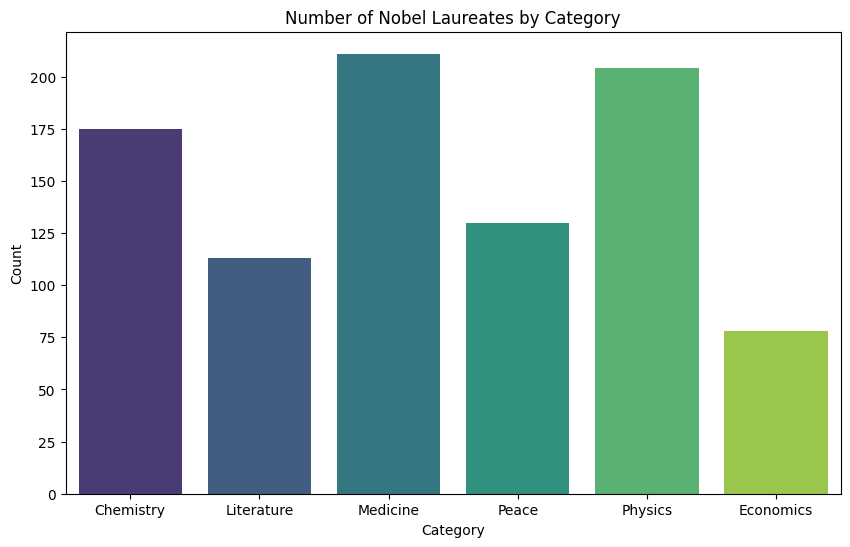

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', palette='viridis')
plt.title("Number of Nobel Laureates by Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

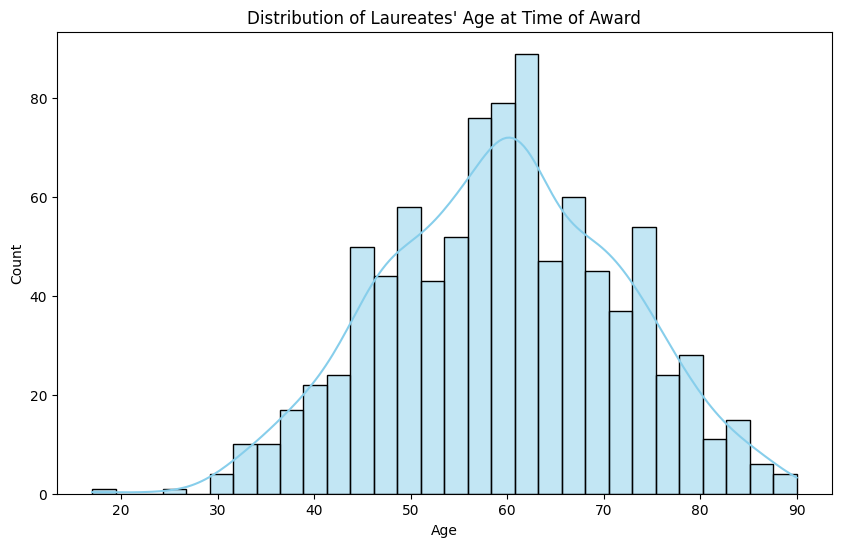

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Laureates' Age at Time of Award")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

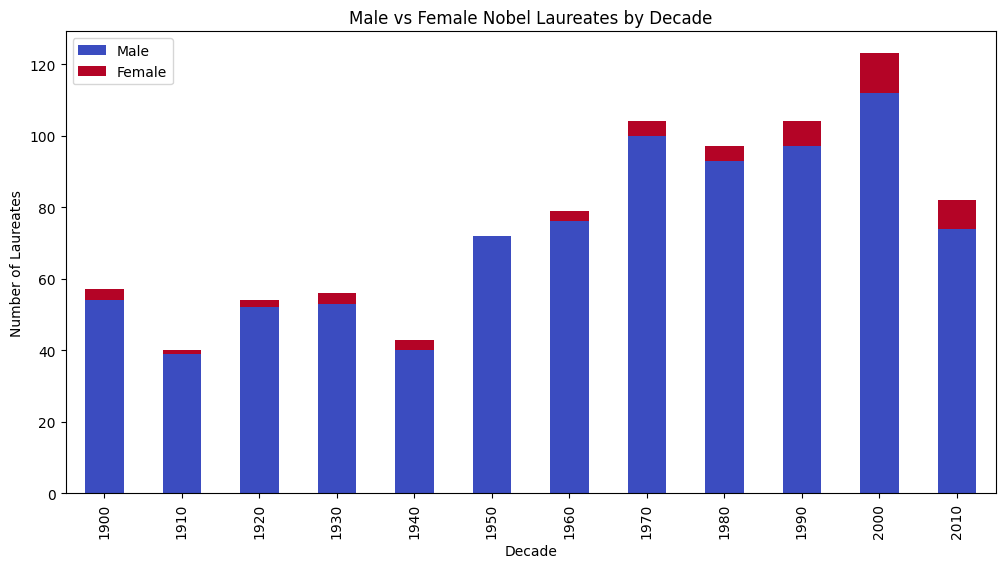

In [15]:
decade_gender = df.groupby(['decade', 'female']).size().unstack(fill_value=0)
decade_gender.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Male vs Female Nobel Laureates by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Laureates")
plt.legend(["Male", "Female"])
plt.show()

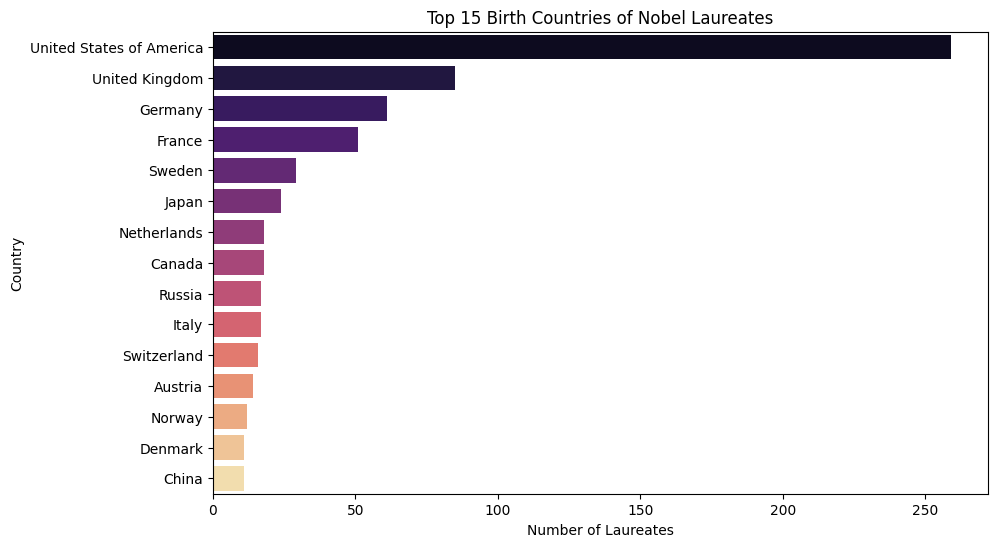

In [16]:
top_countries = df['birth_country'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 15 Birth Countries of Nobel Laureates")
plt.xlabel("Number of Laureates")
plt.ylabel("Country")
plt.show()

In [17]:
import plotly.express as px

In [18]:
country_counts = df['birth_country'].value_counts().reset_index()
country_counts.columns = ['birth_country', 'count']
fig = px.choropleth(country_counts, locations="birth_country", locationmode='country names',
                    color="count", hover_name="birth_country", color_continuous_scale="Viridis",
                    title="Global Distribution of Nobel Laureates by Birth Country")
fig.show()


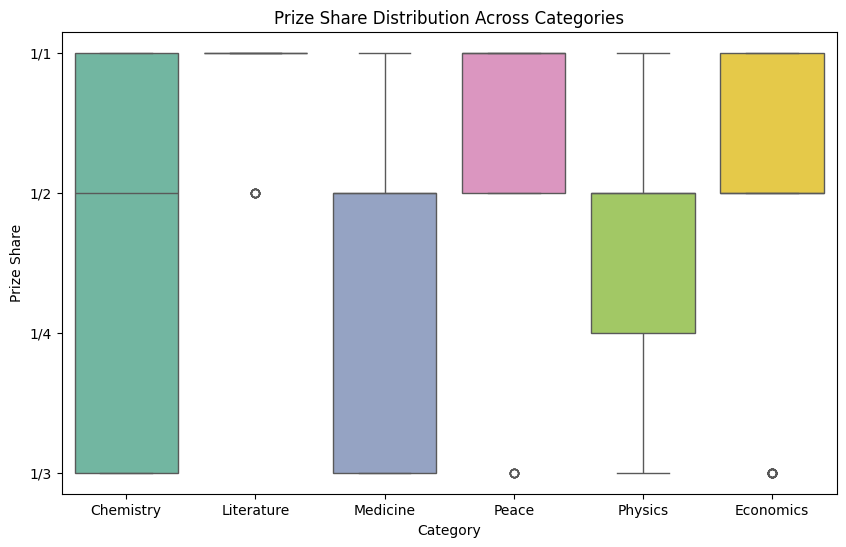

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='prize_share', palette='Set2')
plt.title("Prize Share Distribution Across Categories")
plt.ylabel("Prize Share")
plt.xlabel("Category")
plt.show()

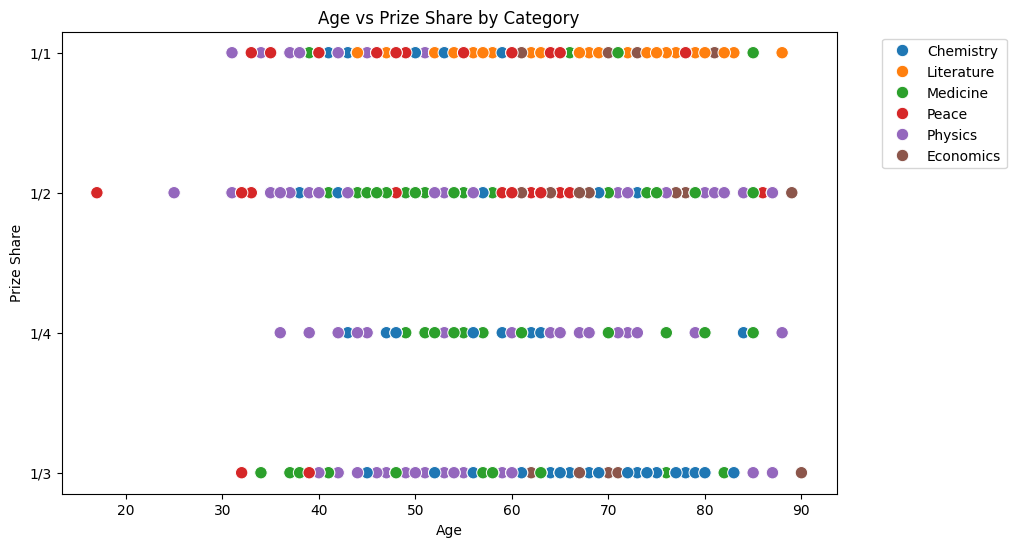

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='prize_share', hue='category', palette='tab10', s=80)
plt.title("Age vs Prize Share by Category")
plt.xlabel("Age")
plt.ylabel("Prize Share")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

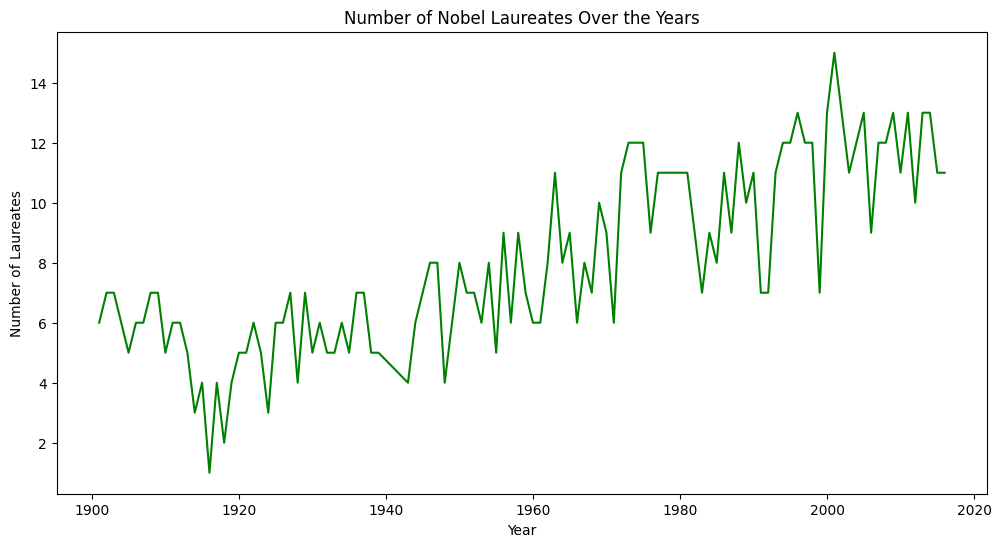

In [21]:
laureates_per_year = df.groupby('year').size()
plt.figure(figsize=(12,6))
sns.lineplot(x=laureates_per_year.index, y=laureates_per_year.values, color='green')
plt.title("Number of Nobel Laureates Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Laureates")
plt.show()

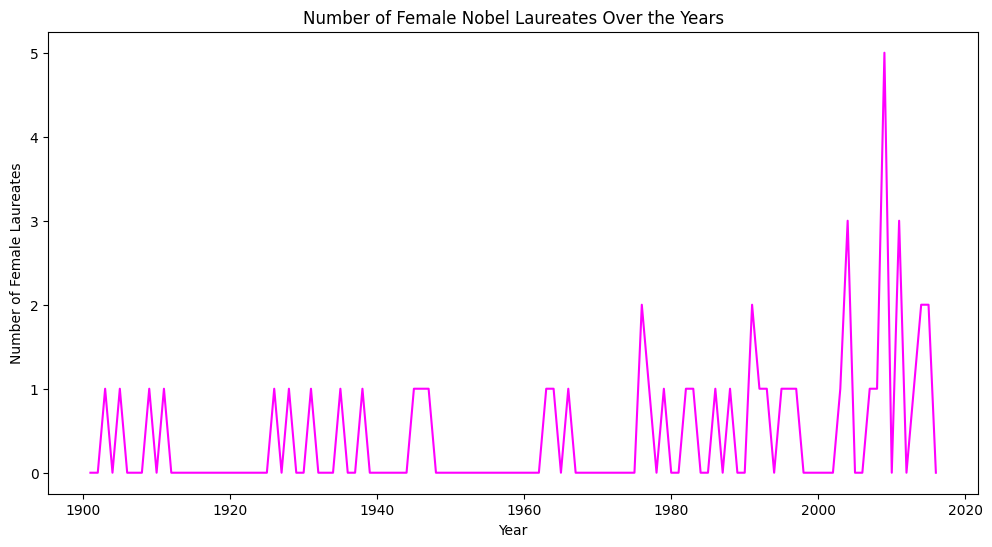

In [22]:
female_per_year = df.groupby('year')['female'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=female_per_year.index, y=female_per_year.values, color='magenta')
plt.title("Number of Female Nobel Laureates Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Female Laureates")
plt.show()

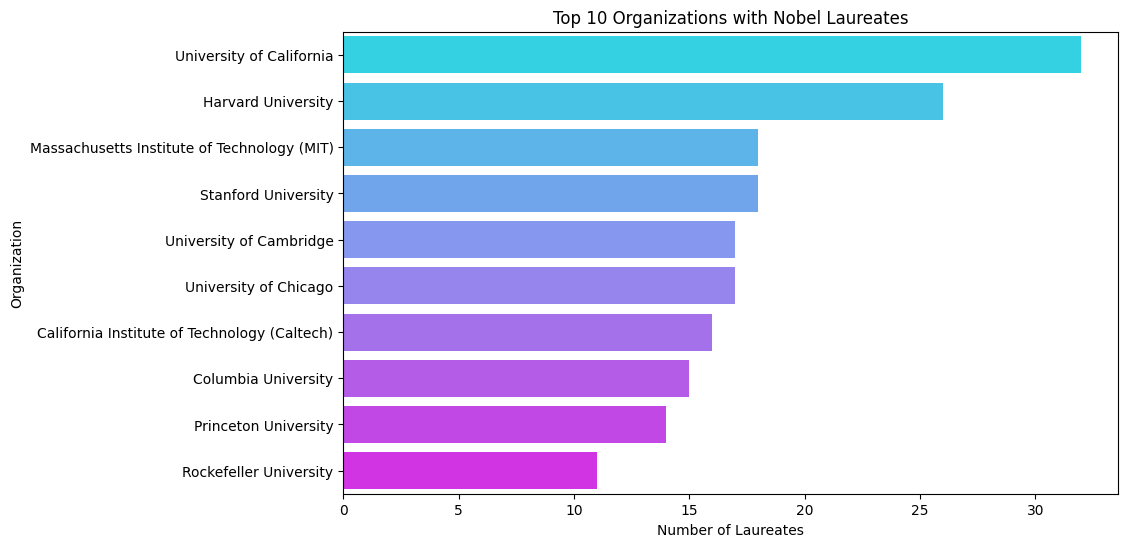

In [23]:
top_orgs = df['organization_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_orgs.values, y=top_orgs.index, palette='cool')
plt.title("Top 10 Organizations with Nobel Laureates")
plt.xlabel("Number of Laureates")
plt.ylabel("Organization")
plt.show()

## ML

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

In [26]:
df["age"] = df["age"].fillna(df["age"].median())
df.fillna("Unknown", inplace=True)

In [27]:
categorical_cols = [
    "category", "prize", "laureate_type", "birth_country",
    "sex", "organization_country", "age_group"
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [28]:
X = df[
    ["year", "age", "sex", "birth_country",
     "organization_country", "female", "usa_born_winner"]
]

y = df["category"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [32]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results.append({"Model": name, "Accuracy (%)": round(acc, 2)})
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.30      0.09      0.13        35
           1       0.46      0.38      0.41        16
           2       0.48      0.91      0.63        23
           3       0.31      0.33      0.32        42
           4       0.53      0.31      0.39        26
           5       0.38      0.51      0.43        41

    accuracy                           0.40       183
   macro avg       0.41      0.42      0.39       183
weighted avg       0.39      0.40      0.37       183


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.30      0.31      0.31        35
           1       0.47      0.44      0.45        16
           2       0.52      0.57      0.54        23
           3       0.32      0.33      0.33        42
           4       0.58      0.58      0.58        26
           5       0.28      0.24      0.26        41

    accuracy               

In [33]:
results_df = pd.DataFrame(results)
print("\nSummary of Model Accuracies:")
print(results_df)


Summary of Model Accuracies:
                    Model  Accuracy (%)
0     Logistic Regression         39.89
1           Decision Tree         38.25
2           Random Forest         38.80
3       Gradient Boosting         34.97
4  Support Vector Machine         38.80
5     K-Nearest Neighbors         27.87
6             Naive Bayes         37.70


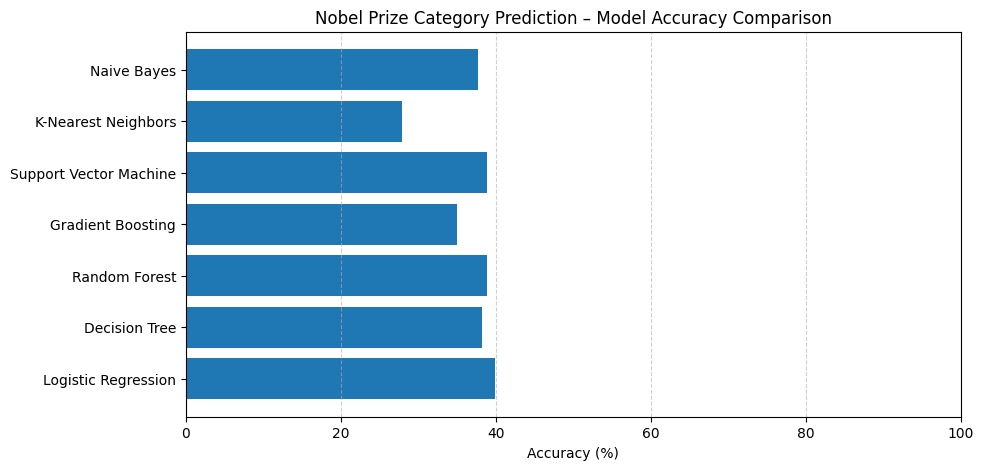

In [34]:
plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Accuracy (%)"])
plt.xlabel("Accuracy (%)")
plt.title("Nobel Prize Category Prediction – Model Accuracy Comparison")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## Thank you..pls upvote!!!!